# 기계학습(machine learning)의 기본개념

## 데이터의 종류

기계학습은 데이터를 예측하는 모델의 정확한 변수값을 모르는 상태에서 이미 주어진 데이터를 통해 최적의 변수를 찾아내는 과정입니다.

이를 위해 훈련 데이터(training data)와 시험 데이터(test data)가 필요합니다.

> 훈련 데이터는 기본적으로 변수값을 최적화시키기 위해 사용되는 데이터 입니다.
>
> 훈련 데이터가 부정확하다면, 결과도 부정확합니다. (**Garbage in, garbage out**)
>
> 따라서 기계학습을 성공적으로 수행하기 위한 첫번째 단계는 좋은 훈련 데이터를 준비하는 것입니다.

훈련 데이터를 이용하여 변수값을 찾았다면 이것이 정확한지 테스트 하기 위해 사용하는 데이터가 시험 데이터입니다.

일반적으로 시험 데이터는 훈련 데이터의 크기보다 작습니다.

보통 데이터는 훈련용과 시험용이 구분되어 있지 않으므로 무작위로 데이터를 구분하여 사용합니다.

이를 미니배치(mini-batch)라 합니다.

> 만약 시험 데이터가 지나치게 적거나 편향되어 있다면 어떤 문제가 생길 수 있나요?
>
> 모델이 훈련 데이터에 지나치게 최적화 된 상태를 오버피팅(overfitting)이라고 합니다.
>
> 오버피팅은 잘못된 모델링으로 인해 일어날 수도 있지만, 잘못된 데이터로 인해 일어날 수도 있습니다.
>
> 예를 들어 사진을 '개' 또는 '고양이'를 분류하는 모델을 학습시킨다고 합시다.
>
> '개'의 사진만을 가지고 학습 시킨 모델은 '개'는 정확히 맞출 수 있으나 '고양이'는 정확히 맞출 수가 없습니다.
>
> (오히려 '고양이'를 '개'라고 잘못 분류하는 경우가 더 많을 것입니다.

## 손실 함수(loss function)

모델링을 최적화시키기 위해서는 정확도가 향상되는 방향으로 조금씩 변수값을 조정해야 합니다.

다시 말하면 정확도가 떨어짐으로서 발생하는 손실(loss)이 최소화되어야 합니다.

손실 함수란 기계 학습의 정확도를 가리키는 지표입니다.

### 1. 평균 제곱 오차(mean squre error)

평균제곱오차는 가장 많이 쓰이는 손실함수의 하나입니다.

모델 예측값 $y_k$라 하고 실제값을 $t_k$라 하면 평균 제곱 오차 $E$는 다음과 같습니다.

$$E = \frac{1}{2}\sum_{k=1}^N(y_k-t_k)^2$$

여기서 $N$은 데이터의 크기입니다. 

편차의 제곱을 하는 이유는 참값($t_k$)보다 실제값($y_k$)이 작거나 큰 경우를 동일하게 보기 위함입니다.

In [1]:
def msq(y,t):
    return .5 * np.sum((y-t) ** 2)

### 2. 교차 엔트로피 오차

교차 엔트로피 오차는(cross-entropy error)는 평균 제곱 오차와는 약간 성격이 다릅니다. 모델 예측값을 $y_k$ 참값을 $t_k$라 합시다. 교차 엔트로피 오차는 다음과 같이 정의됩니다.

$$E = -\sum_k t_k\log y_k$$

만약 예측하고자 하는 값이 참(1) 또는 거짓(0)이라면 모든 $t_k$는 $0$ 또는 $1$로 기록되어 있습니다. 그러나 예측값 $y_k$는 $0$에서 $1$사이의 실수값으로 기록될 것입니다. 먄약 $t_k$가 $0$이라면 $t_k\log y_k$는 항상 $0$입니다. 만약 $t_k$가 $1$이라면 $t_k\log y_k$는 $y_k$이 클수록 더 작은 음의 실수를 가리킵니다. 오차값 $E$에 음의 부호가 붙어있으므로, $E$는 항상 양수입니다. 또한 $t_k$가 $1$인 $y_k$가 $1$에 가까울수록 $E$가 작아짐을 알 수 있습니다. 다시 말해, 참값이 $1$인 데이터를 잘 예측할 수록 $E$가 작아집니다.

실제로, 예측값 $y_k$가 $0$이 되면 $\log$값이 마이너스 무한대를 반환하므로 계산에 오류가 발생합니다. 따라서 실제 구현에서는 $y_k$ 값에 아주 작은 $\delta$를 더하여 $0$이 되지 않게 합니다.

In [2]:
def cross_entropy(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

위의 교차 엔트로피에 사용된 레이블 $y_k$, $t_k$는 하나의 데이터에 대한 출력 뉴런의 값과 정답값입니다. 예를 들어 MNIST 데이터셋의 경우, 하나의 데이터마다 10개의 레이블(0,1,2,...,9)이 있습니다. 기계학습을 위해서는 아주 많은 수의 데이터를 학습시켜야 하고, 이것에 대한 교차 엔트로피를 구해야 합니다. 즉, $N$개의 데이터가 있다고 하면 각 $n$번째 데이터마다 교차엔트로피를 구해서 평균을 구합니다.
$$E = -\frac{1}{N}\sum_n\sum_k t_{nk}\log y_{nk}$$
그런데 이렇게 하면 계산에 많은 시간이 소요됩니다. MNIST 데이터만 해도 6만개의 데이터가 있습니다. 따라서 모든 데이터를 사용하지 않고, 랜덤으로 몇개의 샘플만 추출해서 계산하는 것이 효율적입니다. 이를 **미니배치(mini-batch)**라 합니다. `np.random.choice`함수를 이용하면 무작위로 원하는 갯수의 샘플을 추출할 수 있습니다.

In [105]:
def cross_entropy_minibatch(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## 기울기벡터(gradient)

위와 같은 손실함수의 값을 줄이기 위해서는 현재 가중치와 편향을 손실함수가 작아지는 쪽으로 변화시켜야가야 합니다. 이를 위해 각 기울기벡터(gradient)를 구해야 합니다. 함수 $f(x,y)$에 대한 기울기 벡터는 다음과 같습니다.
$$\nabla f(x_0,y_0) = (f_x(x_0,y_0),f_y(x_0,y_0))$$
이를 함수로 구현하면 아래와 같습니다. 실제로 편미분을 구현하기는 복잡하므로, 여기서는 수치적 편미분을 이용합니다.

In [96]:
def numerical_gradient_1d(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

In [93]:
def numerical_gradient_2d(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for row in range(x.shape[0]):
        for col in range(x.shape[1]):
            tmp_val = x[row, col]
            x[row, col] = tmp_val + h
            fxh1 = f(x)
        
            x[row, col] = tmp_val - h
            fxh2 = f(x)
        
            grad[row, col] = (fxh1 - fxh2) / (2 * h)
            x[row, col] = tmp_val
    return grad

### 경사하강법(Gradient descent)
경사하강법이란 특점 점에서 기울기벡터 방향으로 조금씩 이동하면서 함수의 극소값을 도달하는 방법입니다. 다시말해 $x^{(0)} = (x_0^{(0)},x_1^{(0)})$에서 시작하였을 때, 음의 기울기 벡터 $-\nabla f(x_0,x_1)$의 방향으로 $\nu$만큼 이동하여 극소값에 근접한 새로운 점 $x^{(1)} = (x_0^{(1)}, x_1^{(1)}$을 찾는 방법입니다. 이를 수식으로 표현하면 아래와 같습니다.
$$x_0^{(1)} = x_0^{(0)} - \nu\frac{\partial f}{\partial x_0}$$
$$x_1^{(1)} = x_1^{(0)} - \nu\frac{\partial f}{\partial x_1}$$

## 간단한 신경망 모델
경사하강법을 이용하여 기계 학습이 구현된 간단한 신경망 모델을 만들어 보겠습니다. 여기서는 **클래스(class)**라는 구조를 사용합니다. 클래스란 딕셔너리 자료형과 비슷하게 변수가 구현될 뿐만 아니라 메서드 함수도 구현되는 자료구조를 말합니다.

In [25]:
import sys, os
import numpy as np

def softmax(x):
    m = np.max(x)
    ex = np.exp(x - m)
    return ex / np.sum(ex)

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_minibatch(y, t)
        return loss

이 `simpleNet`이라는 클래스는 앞서 정의한 `network`를 클래스로 구현한 것입니다. `__init__`은 클래스객체를 초기화하는 함수로서 모든 클래스가 기본으로 구현되어야 합니다. 여기서는 랜덤한 2행 3열의 행렬로 초기화를 시킵니다. 예를 들어 `net`으로 클래스를 생성해 봅시다.

In [73]:
net = simpleNet()
print(net.W)

[[ 1.11724359 -0.69089631  0.43287905]
 [-0.14126068  0.78843414 -0.50883815]]


이제 입력 뉴런 값을 임의로 집어넣고 순전파(forward propagation)를 진행해 봅시다. 

In [74]:
x = np.array([.6, .9])
p = net.predict(x)
print(p)

[ 0.54321154  0.29505294 -0.1982269 ]


위의 실제값에 대한 참값 레이블이 $[0, 1, 0]$ 이었다고 합니다. (즉, 2번째 뉴런이 가장 크게 활성화가 되어야 정확한 결과입니다.)

In [75]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.35401535236446646

이 손실함수의 값을 더 줄이기 위해 경사하강법을 손실함수 $f$에 적용해 봅시다.

In [79]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.08862636 -0.13085045  0.04222409]
 [ 0.13293954 -0.19627567  0.06333613]]


이 기울기벡터 방향으로 가중치를 조금 바꾼 뒤 다시 손실함수를 계산해 봅시다. 위에서 계산한 값보다 조금 줄어드는 것을 확인할 수 있습니다.

In [82]:
nu = 1e-2
net.W -= nu * dW
net.loss(x, t)

0.3521917591376414

### 2층 신경망 클래스 구현
기계학습은 위 과정을 반복하는 것입니다.
1. 레이어의 수, 각 레이어마다 뉴런의 갯수, 가중치와 편향을 고려한 신경망 모델 제작
2. 미니배치, 손실함수 설정
3. 기울기벡터 구하기
4. 매개변수(가중치, 편향 값) 갱신
5. 1-4 반복

위 방법을 적용하여 2층 신경망 클래스를 구현하고 MNIST 데이터셋으로 검증해 봅시다.

In [120]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax(x):
    m = np.max(x)
    ex = np.exp(x - m)
    return ex / np.sum(ex)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)    

In [121]:
import sys, os
import numpy as np

def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
    return grad

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [122]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [ ]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


train acc, test acc | 0.10293333333333334, 0.0979


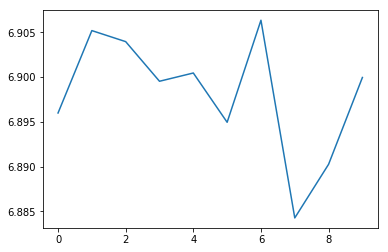

In [110]:
import matplotlib.pyplot as plt
x = np.arange(len(train_loss_list))
y = train_loss_list
plt.plot(x,y)
plt.show()